# **EDA on HABERMAN data-set**
##Data-set contains 4 columns: age , year , nodes , status
- **age**: Age of patient at time of operation 
- **year**: Operation Year
- **nodes**: Number of positive axillary nodes detected. 
- **status**: 1 = the patient survived 5 years or longer,  2 = the patient died within 5 years

**OBJECTIVE: To perform Exploratory Data Analysis(EDA) on data-set**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 



In [4]:
from google.colab import files
files = files.upload()

Saving haberman (1).csv to haberman (1).csv


In [5]:
df = pd.read_csv('haberman (1).csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## **High level analysis:**

In [6]:
print(df.shape)
df.info()

(306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**observation: no presence of missing/null values**

In [7]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observation: 75% (3rd quantile) of nodes are less than 4 , 75% of patients age is less than 60**

In [8]:
df['nodes'].value_counts().head()

0    136
1     41
2     20
3     20
4     13
Name: nodes, dtype: int64

- Top 5 node values
- 0 nodes being the highest value(count = 136) followed by 1(count = 146)

In [9]:
df['age'].value_counts().head(10)

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
Name: age, dtype: int64

- top 10 ages of patients ranges from 49-52 years

In [10]:
df.groupby('status').count()

,age,year,nodes
status,,,
1,225,225,225
2,81,81,81


- Observation: there are more survivors compared to non-survivors

### **Converting numerical feature - status(0 or 1) to categorical feature - survived (yes or no)**

In [11]:
d = {1:'yes',2:'no'}
df['survived'] = df['status'].map(d)
df.head()

,age,year,nodes,status,survived
0,30,64,1,1,yes
1,30,62,3,1,yes
2,30,65,0,1,yes
3,31,59,2,1,yes
4,31,65,4,1,yes


### **Splitting data into survived and not survived data-frames**

In [12]:
df_survived = df[df['survived']=='yes']
df_survived.head()

,age,year,nodes,status,survived
0,30,64,1,1,yes
1,30,62,3,1,yes
2,30,65,0,1,yes
3,31,59,2,1,yes
4,31,65,4,1,yes


In [13]:
df_notsurvived = df[df['survived']=='no']
df_notsurvived.head()

,age,year,nodes,status,survived
7,34,59,0,2,no
8,34,66,9,2,no
24,38,69,21,2,no
34,39,66,0,2,no
43,41,60,23,2,no


# **Univariate Analysis**

Survived Dataset:

Text(0.5, 1.0, 'CDF survived patients-nodes')

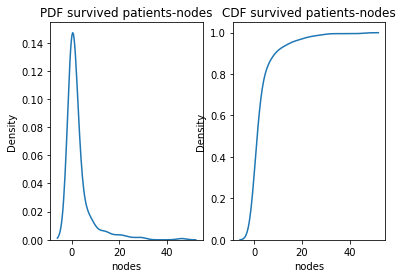

In [14]:
plt.subplot(1,2,1)
sns.kdeplot(data = df_survived , x = 'nodes',cumulative=False)
plt.title('PDF survived patients-nodes')

plt.subplot(1,2,2)
sns.kdeplot(data = df_survived , x = 'nodes',cumulative=True)
plt.title('CDF survived patients-nodes')


Observation: Bulk of patients have nodes less than 15

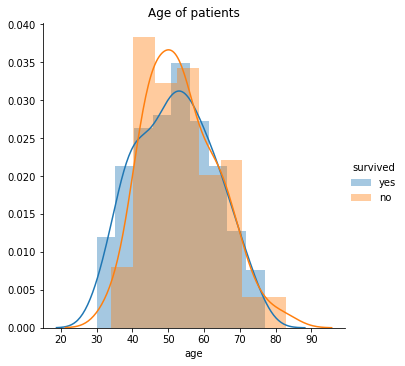

In [15]:
sns.FacetGrid(df, hue="survived", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Age of patients')
plt.show()

**Observations: No considerable difference in age of survived vs not survived patients**

Text(0.5, 1.0, 'boxplot - not survived(age)')

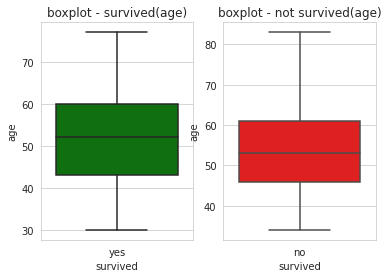

In [16]:
sns.set_style('whitegrid')
plt.subplot(1,2,1)
sns.boxplot(data = df_survived , x = 'survived' , y = 'age',color = 'green')
plt.title('boxplot - survived(age)')

plt.subplot(1,2,2)
sns.boxplot(data = df_notsurvived , x = 'survived' , y = 'age' , color = 'red')
plt.title('boxplot - not survived(age)')

**Observations: No considerable difference in age of survived vs not survived patients**

survived nodes mean:  2.7911111111111113
not-survived nodes mean:  7.45679012345679


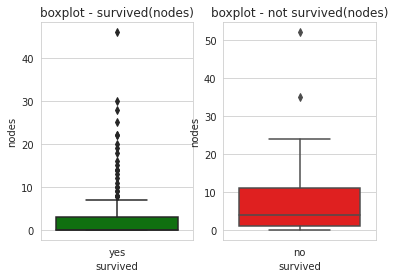

In [17]:
sns.set_style('whitegrid')
plt.subplot(1,2,1)
sns.boxplot(data = df_survived , x = 'survived' , y = 'nodes',color = 'green')
plt.title('boxplot - survived(nodes)')

plt.subplot(1,2,2)
sns.boxplot(data = df_notsurvived , x = 'survived' , y = 'nodes' , color = 'red')
plt.title('boxplot - not survived(nodes)')
print('survived nodes mean:  '+str(df_survived['nodes'].mean()))
print('not-survived nodes mean:  '+str(df_notsurvived['nodes'].mean()))

**Observations: survived patients have very few nodes with mean 2.7 compared to not-survived patients with mean 7.4**

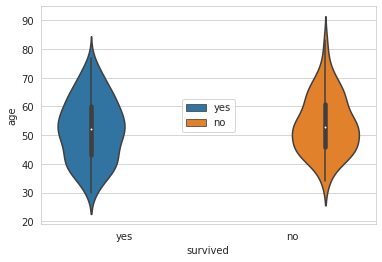

In [18]:
sns.set_style('whitegrid')
sns.violinplot(x="survived", y="age", data = df,hue = 'survived')
plt.legend(loc='center')

**Observations:**

**1. Very few patients are aged above 75 years in survived data , hence it can be noted that most patients above 75 years have not survived**

**2. Most patients below 30 years have survived**

# **Bivariate Analysis**

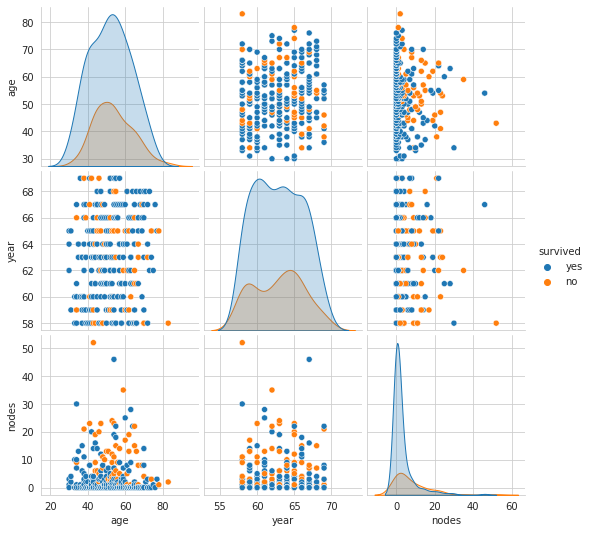

In [23]:
#pair plot 3x3

sns.set_style('whitegrid')
sns.pairplot(data = df , hue = 'survived',vars=['age','year','nodes'])


Observations:
  - There is considerable overlap between features
  - No single feature can be used to classify 
  - nodes vs age seems to provide better classification

Text(0.0, 1.0, 'survived data - age vs nodes')

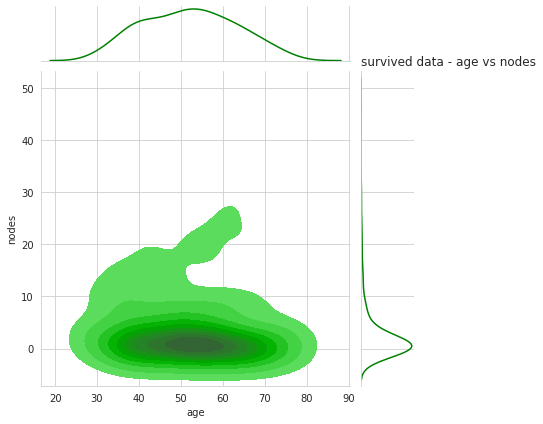

In [20]:
#joint plot

sns.jointplot(data = df_survived , x = 'age' , y='nodes' , kind = 'kde',shade = True,color='green' )
plt.title('survived data - age vs nodes',loc='left',)

**Observations: Patients aged between 35-75 with less than 4 nodes have greatest chance of survival**

Text(0.0, 1.0, 'not survived data - age vs nodes')

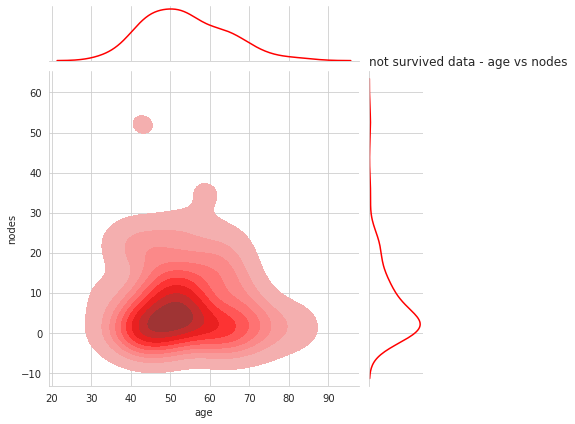

In [21]:
#joint plot

sns.jointplot(data = df_notsurvived , x = 'age' , y='nodes' , kind = 'kde',shade = True,color = 'red' )
plt.title('not survived data - age vs nodes',loc='left',)

**Observations: Patients with higher number of nodes(5-30) have least chance of survival**

In [22]:
#survived patients:
print('--- SURVIVED PATIENTS ---')
print("Mean age:  "+str(np.mean(df_survived['age'])))
print("Mean number of nodes:  "+str(np.mean(df_survived['nodes'])))
print('90th percentile - number of nodes: '+str(np.percentile(df_survived['nodes'],90)))
print("")
print("")
print('--- DEAD PATIENTS ---')
print("Mean age:  "+str(np.mean(df_notsurvived['age'])))
print("Mean number of nodes:  "+str(np.mean(df_notsurvived['nodes'])))
print('90th percentile - number of nodes: '+str(np.percentile(df_notsurvived['nodes'],90)))

--- SURVIVED PATIENTS ---
Mean age:  52.01777777777778
Mean number of nodes:  2.7911111111111113
90th percentile - number of nodes: 8.0


--- DEAD PATIENTS ---
Mean age:  53.67901234567901
Mean number of nodes:  7.45679012345679
90th percentile - number of nodes: 20.0


#SUMMARY
- Due to significant overlap in data, perfectly classifing features can't be obtained
- Of the three features , nodes is the most important feature followed by age
- Patients having nodes less than 4 have greatest chance of survival
- Patients below age of 35  and age above 75 have highest chance of survival